# Overview:
This is the dataset of “Google play store” formerly Android Market, is a digital distribution service operated and developed    by Google. The dataset contains 10841 rows and 13 columns with details of Android applications available on Google Play     store, Category, Rating, Reviews, Type, price, size, installs, genres, last update, Current version & Android version. 



#  Import  packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read data

In [2]:
df=pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Shape

In [3]:
df.shape

(10841, 13)

# Columns

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Find Null values in dataset & drop it.

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
df.shape

(9360, 13)



# Print information & summary.

In [8]:
df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


# Display data types for each feature.

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Convert to numeric data set.
 # - For analysis we need to convert Reviews,Type,price,Installs,Size,Current Ver & Android Ver

In [10]:
le1=LabelEncoder()
df.Reviews = df.Reviews.astype('int64')
df["Reviews"].dtype


dtype('int64')

In [11]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else str(x))
df['Size'] = df['Size'].apply(lambda x: str(x).replace("1,000+", '1000') if "1,000+" in str(x) else str(x))
df['Size'] = df['Size'].apply(lambda x: float(x))

df["Size"].dtype

dtype('float64')

In [12]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '0') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '0') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Installs'].dtype

dtype('float64')

In [14]:
df["Type"]=le1.fit_transform(df["Type"])#free=0,paid=1
df["Type"].dtype

dtype('int32')

In [15]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') )
df['Price'] = df['Price'].replace('Everyone', np.nan)
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price'].dtype

dtype('float64')

In [16]:
df["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [17]:
df["Current Ver"]=le1.fit_transform(df["Current Ver"])

In [18]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [19]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5856
0.0    1319
2.0    1177
5.0     556
3.0     250
1.0     104
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [20]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type                int32
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver         int32
Android Ver       float64
dtype: object

# Show counts of all the Categories & display in bar graph.

In [21]:
df.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

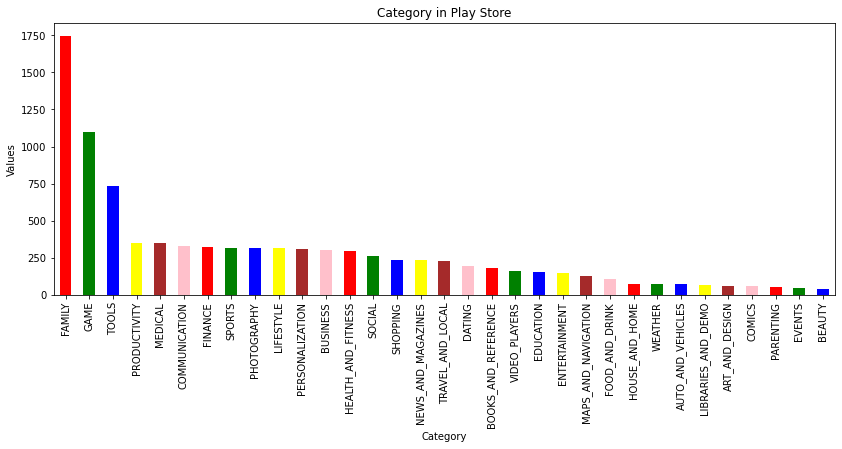

In [22]:
df.Category.value_counts().plot(kind="bar",title="Category in Play Store",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Values")
plt.xlabel("Category")

plt.show()



# Type

# How many of the apps are free & paid in play store, and show on pie chart.

In [23]:
df.Type.value_counts()

0    8715
1     645
Name: Type, dtype: int64

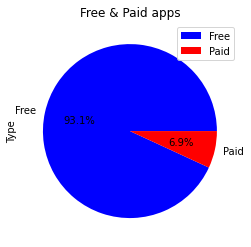

In [24]:
df.Type.value_counts().plot(kind="pie",labels=["Free","Paid"],colors=["blue","red"],autopct='%0.1f%%')
plt.title("Free & Paid apps")
plt.legend(loc="upper right")
plt.show()

# Find the most costly app in playstore.

In [25]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,1000000.0,1,400.0,Everyone,Lifestyle,"May 3, 2018",127,4.0


# How many of apps with 5.0 ratings are Free to install.

In [26]:
a=df[(df["Rating"]==5) & (df["Type"]==0)].count()

In [27]:
print("No. of Apps with 5 rating & free to install is: ",a.App)

No. of Apps with 5 rating & free to install is:  246


# Paid apps with full Rating.

In [28]:
s=df[(df["Type"]==1) & (df["Rating"]==5)].App
s

2262              Super Hearing Secret Voices Recorder PRO
2271                                        FHR 5-Tier 2.0
3957                                          ADS-B Driver
4452                                       P-Home for KLWP
4477                             Android P Style Icon Pack
4988                                  Easy Hotspot Ad Free
5237                                Hey AJ! It's Saturday!
5246                                 Hey AJ! It's Bedtime!
5260                                AJ Gray Dark Icon Pack
5263                                     AJ Blue Icon Pack
5482                            meStudying: AP English Lit
5489                             AP Art History Flashcards
5917                                              Ra Ga Ba
5966                                          BC MVA Fines
7100                                           CA Speakers
7204             TI-84 CE Graphing Calculator Manual TI 84
7377                                 CI 174 Gray Icon Pa

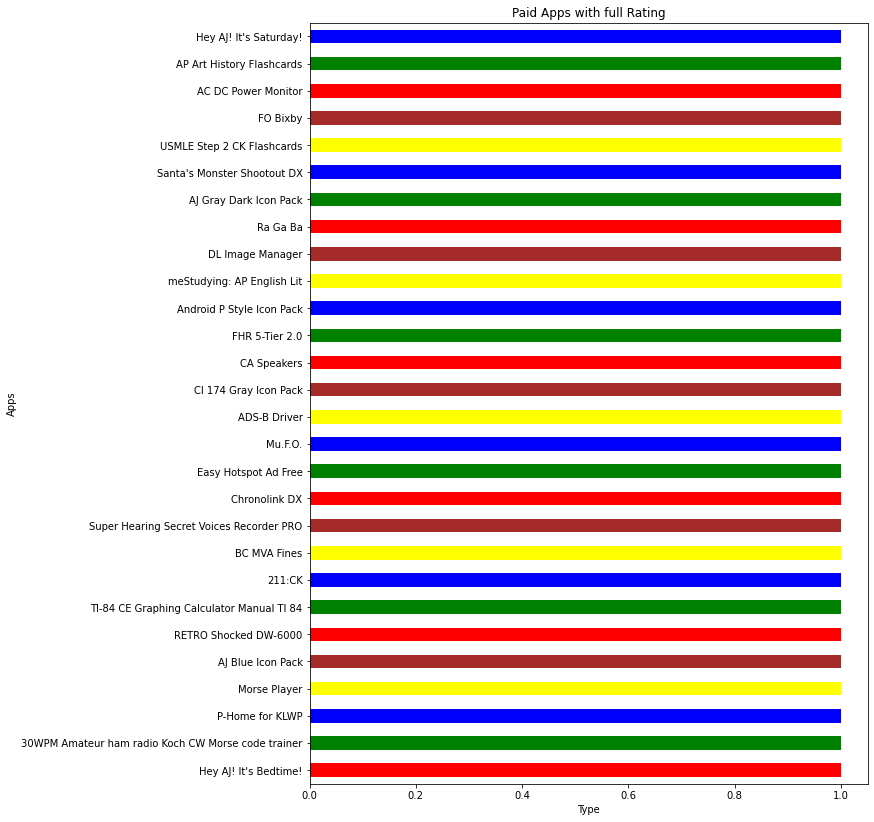

No. of paid apps with full rating: 28


In [29]:
r=s.value_counts()
r.plot(kind="barh",title="Paid Apps with full Rating",figsize= (10,14),color=["Red","green","blue","yellow","brown"])
plt.xlabel("Type")
plt.ylabel("Apps")
plt.show()
print("No. of paid apps with full rating:", r.count())

# How many of apps installed based on type(ie, for paid & free)

In [30]:
x=df[(df["Type"]==0) & (df["Installs"]>=10000000000.0)].App.count()
y=df[(df["Type"]==1) & (df["Installs"]>=10000000000.0)].App.count()
print("No. of Apps installed based on Type(free) & installation greater than 10000000: ",x)
print("No. of Apps installed based on Type(paid) & installation greater than 10000000: ",y)

No. of Apps installed based on Type(free) & installation greater than 10000000:  2077
No. of Apps installed based on Type(paid) & installation greater than 10000000:  3


# Rating

# How many apps are having rating 4 & 5 under each categories.

In [31]:
r=df[(df.Rating >= 4) & (df.Rating == 5)].Category
r

329         COMICS
612         DATING
615         DATING
633         DATING
636         DATING
           ...    
10721         GAME
10742    LIFESTYLE
10776         GAME
10820       FAMILY
10837       FAMILY
Name: Category, Length: 274, dtype: object

In [32]:
r_count=r.value_counts()
r_count

FAMILY                 67
LIFESTYLE              29
MEDICAL                28
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
PRODUCTIVITY            8
SOCIAL                  8
FINANCE                 8
NEWS_AND_MAGAZINES      7
PHOTOGRAPHY             6
BOOKS_AND_REFERENCE     6
SHOPPING                6
DATING                  6
EVENTS                  6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
COMICS                  2
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
ART_AND_DESIGN          1
PARENTING               1
Name: Category, dtype: int64

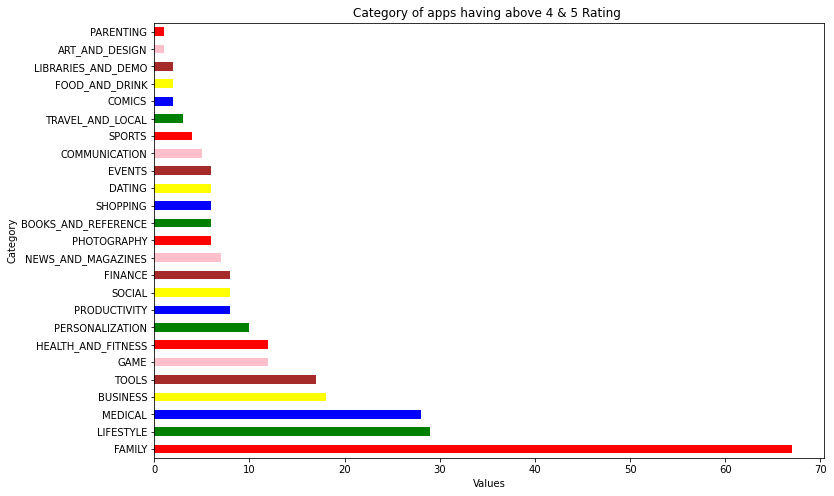

In [33]:
r.value_counts().plot(kind="barh",title="Category of apps having above 4 & 5 Rating ",figsize= (12,8),color=["Red","green","blue","yellow","brown","pink"])
plt.xlabel("Values")
plt.ylabel("Category")
plt.show()

# How many reviews for 5 rating apps & below 5 rating apps

In [34]:
x=df[(df["Rating"]==5)]
y=x[['App','Reviews','Rating']][:10]
y

,App,Reviews,Rating
329,Hojiboy Tojiboyev Life Hacks,15,5.0
612,American Girls Mobile Numbers,5,5.0
615,Awake Dating,2,5.0
633,Spine- The dating app,5,5.0
636,Girls Live Talk - Free Text and Video Chat,6,5.0
640,Online Girls Chat Group,5,5.0
654,Speeding Joyride & Car Meet App,3,5.0
1028,SUMMER SONIC app,4,5.0
1030,Prosperity,16,5.0
1038,Mindvalley U Tallinn 2018,1,5.0


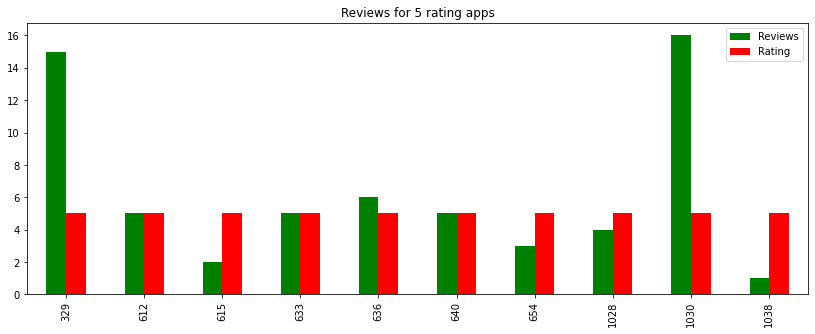

In [35]:
y.plot(kind="bar",title="Reviews for 5 rating apps",figsize= (14,5),color=["green","red"])
plt.legend()
plt.show()

In [36]:
z=df[(df["Rating"]<5)]
b=z[['Rating']][:5]
a=z[['Reviews']][:5]
z[['App','Reviews','Rating']][:5]


,App,Reviews,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,4.1
1,Coloring book moana,967,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,4.7
3,Sketch - Draw & Paint,215644,4.5
4,Pixel Draw - Number Art Coloring Book,967,4.3


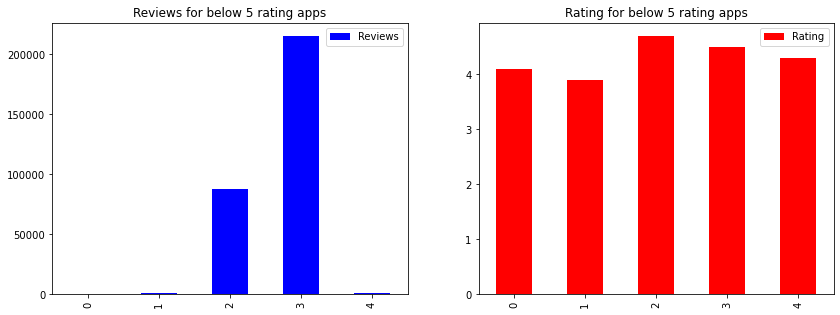

In [37]:
fig,axs = plt.subplots(1,2)
a.plot(kind="bar",title="Reviews for below 5 rating apps",figsize= (14,5),color=["blue"],ax=axs[0])
b.plot(kind="bar",title="Rating for below 5 rating apps",figsize= (14,5),color=["red"],ax=axs[1])

plt.legend()
plt.show()

# Average rating of  each category.

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

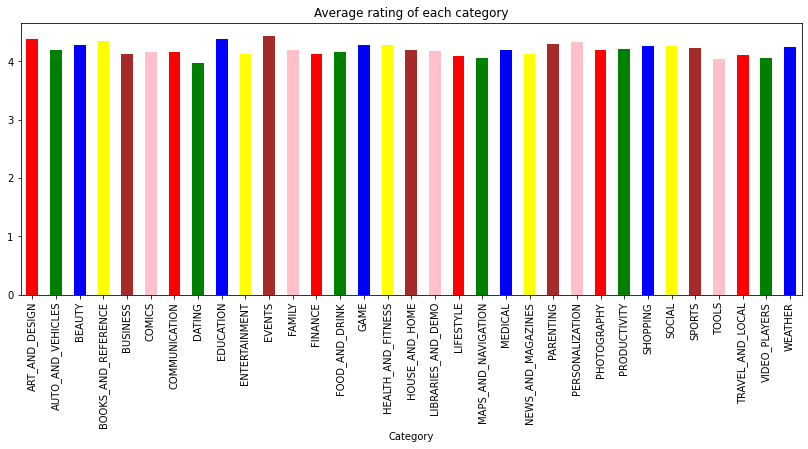

In [38]:
grup = df.groupby('Category')
x = grup['Rating'].agg(np.mean)
print(x)
x.plot(kind="bar",title="Average rating of each category",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.show()

# Average Reviews of  each category .

Category
ART_AND_DESIGN         2.810356e+04
AUTO_AND_VEHICLES      1.594014e+04
BEAUTY                 9.407929e+03
BOOKS_AND_REFERENCE    1.233633e+05
BUSINESS               4.605309e+04
COMICS                 5.830940e+04
COMMUNICATION          2.486164e+06
DATING                 3.738994e+04
EDUCATION              2.554517e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 3.568667e+03
FAMILY                 2.349501e+05
FINANCE                5.433562e+04
FOOD_AND_DRINK         8.149550e+04
GAME                   1.445232e+06
HEALTH_AND_FITNESS     1.275880e+05
HOUSE_AND_HOME         5.231584e+04
LIBRARIES_AND_DEMO     1.583422e+04
LIFESTYLE              4.102474e+04
MAPS_AND_NAVIGATION    2.472505e+05
MEDICAL                4.530349e+03
NEWS_AND_MAGAZINES     2.334760e+05
PARENTING              1.907218e+04
PERSONALIZATION        2.863634e+05
PHOTOGRAPHY            6.735540e+05
PRODUCTIVITY           3.251189e+05
SHOPPING               4.833657e+05
SOCIAL             

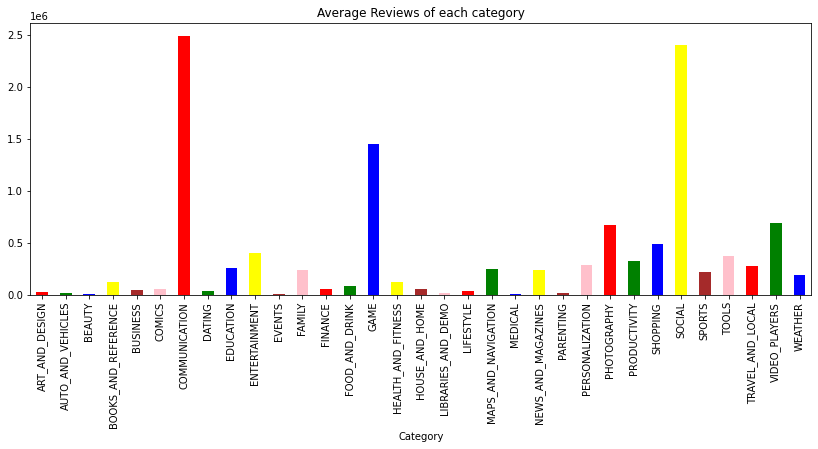

In [39]:
y= grup['Reviews'].agg(np.mean)
print(y)
y.plot(kind="bar",title="Average Reviews of each category",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.show()

# Average installation of each category.

Category
ART_AND_DESIGN         1.959390e+09
AUTO_AND_VEHICLES      6.645592e+08
BEAUTY                 5.569429e+08
BOOKS_AND_REFERENCE    6.129848e+10
BUSINESS               3.274178e+09
COMICS                 9.035104e+08
COMMUNICATION          6.208559e+11
DATING                 1.275534e+09
EDUCATION              5.567324e+09
ENTERTAINMENT          7.963970e+10
EVENTS                 3.154363e+08
FAMILY                 1.098440e+10
FINANCE                2.676040e+09
FOOD_AND_DRINK         2.464016e+09
GAME                   8.117182e+10
HEALTH_AND_FITNESS     5.269378e+09
HOUSE_AND_HOME         2.140239e+09
LIBRARIES_AND_DEMO     8.970047e+08
LIFESTYLE              1.664508e+09
MAPS_AND_NAVIGATION    5.817151e+09
MEDICAL                1.129132e+08
NEWS_AND_MAGAZINES     1.866512e+11
PARENTING              5.662320e+08
PERSONALIZATION        7.414531e+09
PHOTOGRAPHY            1.453625e+11
PRODUCTIVITY           1.429208e+11
SHOPPING               1.359783e+10
SOCIAL             

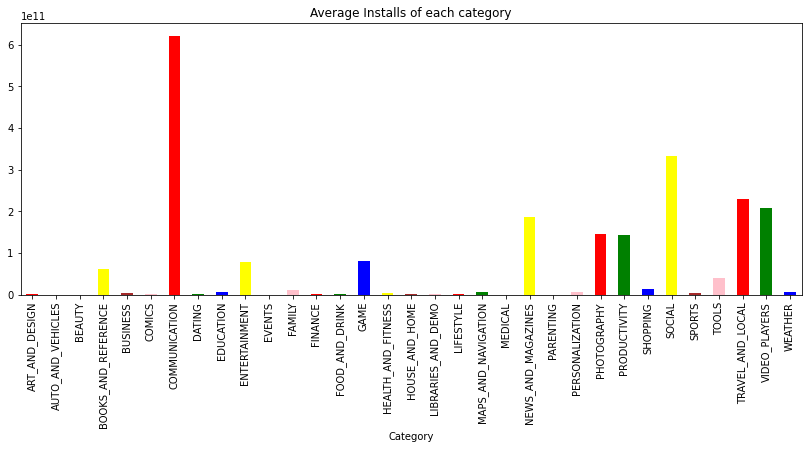

In [40]:
z= grup['Installs'].agg(np.mean)
print(z)
z.plot(kind="bar",title="Average Installs of each category",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.show()

# Average Pricing of each category.

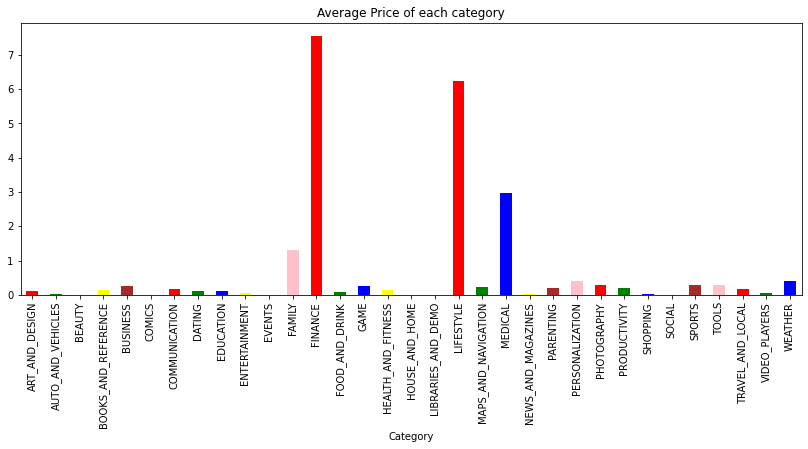

In [41]:
v= grup['Price'].agg(np.mean)
#print(v)
v.plot(kind="bar",title="Average Price of each category",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.show()

# How many of apps having 5.0 rating.

In [42]:
df[df["Rating"]==5].App.value_counts()

Sway Medical                         2
420 BZ Budeze Delivery               2
BP Journal - Blood Pressure Diary    2
Hey AJ! It's Bedtime!                1
EP Church Annapolis                  1
                                    ..
Disciple Maker’s (DM) Lab            1
Cy-Fair Christian Church             1
Mad Dash Fo' Cash                    1
Cloud DX Connected Health            1
DB HOME                              1
Name: App, Length: 271, dtype: int64

In [43]:
print("No. of Apps with 5 ratings: ",df.App[df['Rating']== 5 ].count())

No. of Apps with 5 ratings:  274


<AxesSubplot:>

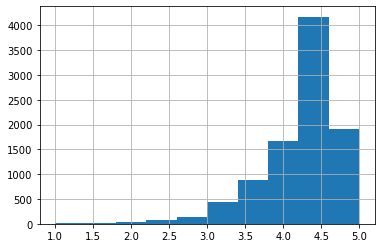

In [44]:
df["Rating"].hist()

# Display first top 3 rating apps.

In [45]:
df[df["Rating"]==5].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,100000.0,0,0.0,Everyone,Comics,"June 26, 2018",951,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,100000.0,0,0.0,Mature 17+,Dating,"July 17, 2018",1432,4.0
615,Awake Dating,DATING,5.0,2,70.0,1000.0,0,0.0,Mature 17+,Dating,"July 24, 2018",1151,4.0


# Apps having full rating & analyse the no. of installation

In [46]:
Rating = df[df.Rating == 5]
installs = Rating[df.Installs >= 500000]

installs[['App', 'Category', 'Installs']]

<ipython-input-46-05d7925e9082>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  installs = Rating[df.Installs >= 500000]


,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,500000.0
8058,Oración CX,LIFESTYLE,500000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,500000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,1000000.0


#  Most popular app based on reviews.

In [47]:
maxr=df[(df.Reviews == df.Reviews.max())]
rat = maxr[df.Rating >= 4.0]

rat[['App', 'Category', 'Installs','Reviews','Rating']]

<ipython-input-47-1eaa9aba487d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rat = maxr[df.Rating >= 4.0]


,App,Category,Installs,Reviews,Rating
2544,Facebook,SOCIAL,1.000000e+13,78158306,4.1


# How many reviews for apps having rating "5"

count    10.000000
mean      1.300000
std       0.483046
min       1.000000
25%       1.000000
50%       1.000000
75%       1.750000
max       2.000000
Name: App, dtype: float64

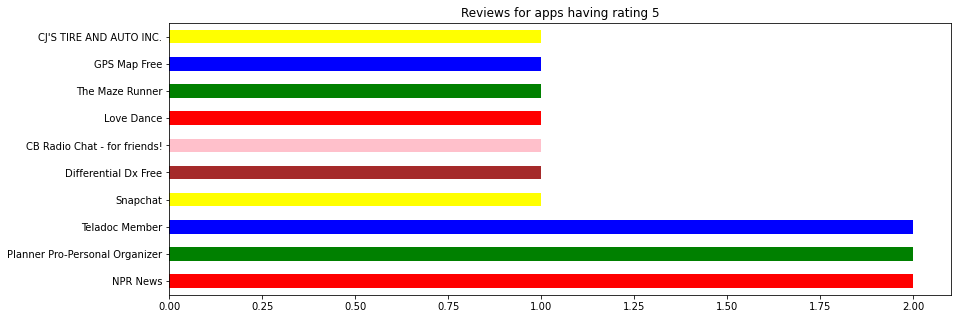

In [48]:
#f=df[df["Rating"]==5].Reviews.value_counts()
f=df[df["Rating"]==5 & df['Reviews']].App.value_counts()[:10]

f.plot(kind="barh",title="Reviews for apps having rating 5",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
f.describe()


Sway Medical                               2
Catholic La Bu Zo Kam                      1
COMSATS BOOK STORE FOR BS(CS)              1
ES Billing System (Offline App)            1
Florida Wildflowers                        1
DN Employee                                1
i am EB                                    1
Nur təfsiri 1-ci cild                      1
CJ'S TIRE AND AUTO INC.                    1
Spring flowers theme couleurs d t space    1
Name: App, dtype: int64

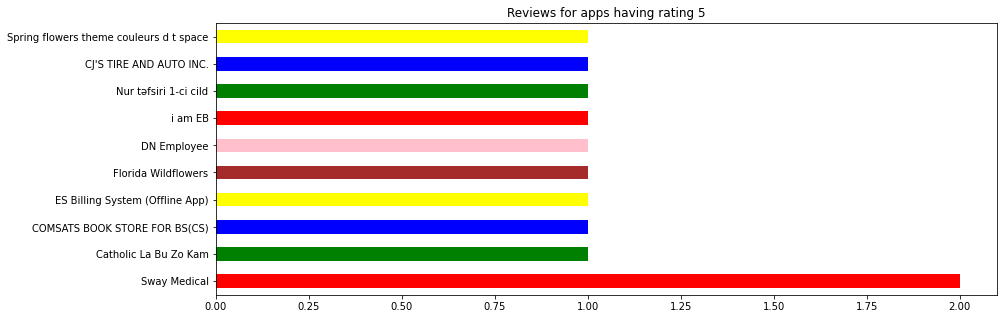

In [49]:
f=df[(df["Rating"]==5) & (df['Reviews'])].App.value_counts()[:10]

f.plot(kind="barh",title="Reviews for apps having rating 5",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
f

# Show top 10 app genres

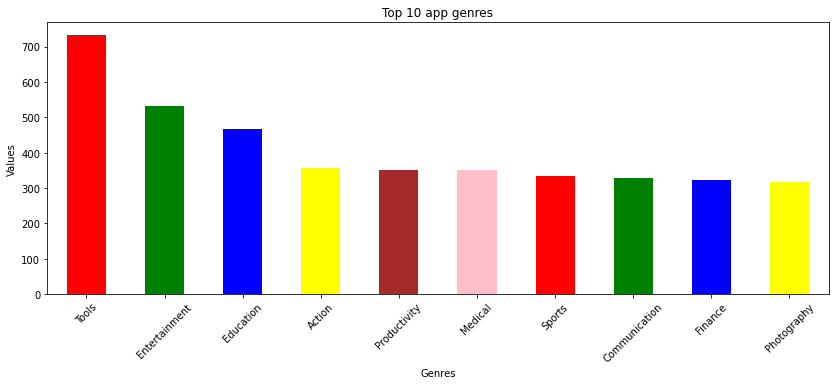

In [50]:
genres = df["Genres"].value_counts()[:10]
genres.plot(kind="bar",title="Top 10 app genres",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Values")
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.show()


# Show in pie chart, related to Genres with 5 Ratings & Installs.

<AxesSubplot:title={'center':'Genres with 5 Ratings & Installs'}, ylabel='Genres'>

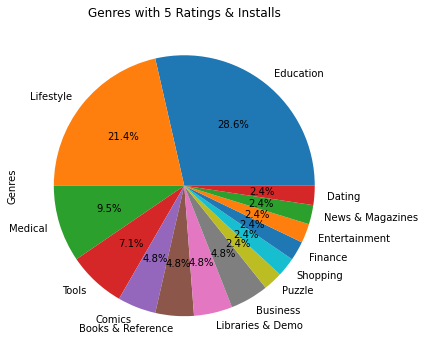

In [51]:
gen=df[(df["Rating"]==5) & (df["Installs"]>=100000)].Genres.value_counts()
gen
gen.plot(kind="pie",title="Genres with 5 Ratings & Installs",figsize= (25,6),autopct='%0.1f%%')

# Apps


# How Many apps are last updated

In [52]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])
update=df["Last Updated"].value_counts()
update[:1]

2018-08-03    319
Name: Last Updated, dtype: int64

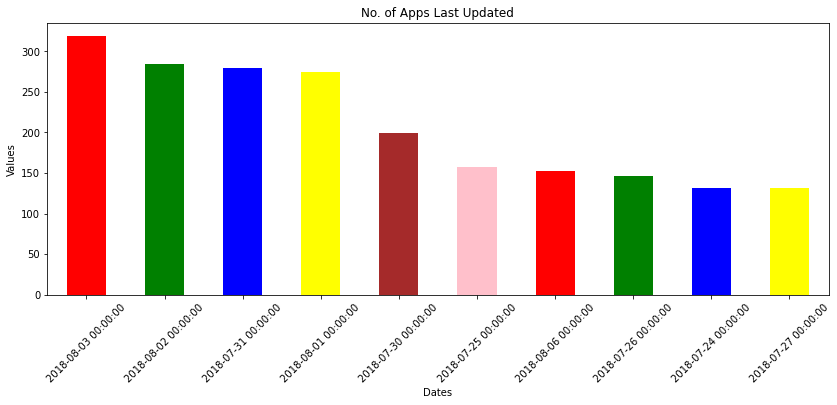

In [53]:
LastUpdated = update[:10]
LastUpdated.plot(kind="bar",title="No. of Apps Last Updated",figsize= (14,5),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Values")
plt.xlabel("Dates")
plt.xticks(rotation=45)
plt.show()

# Last 20 updated Apps

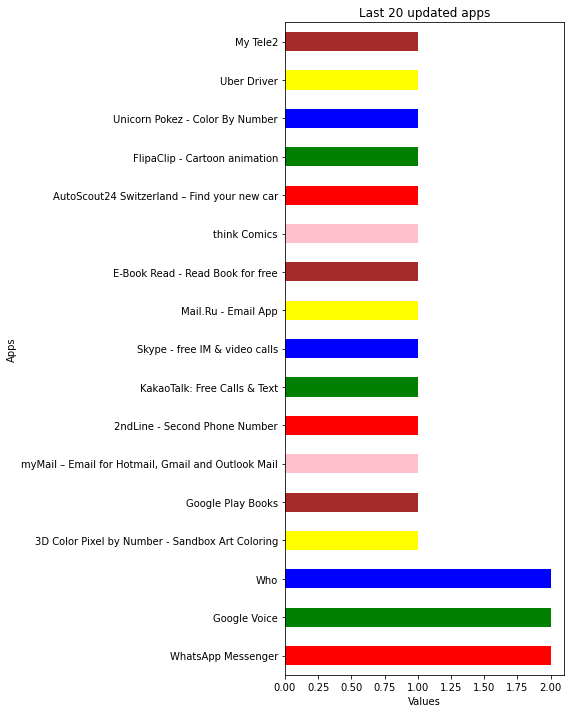

WhatsApp Messenger                                    2
Google Voice                                          2
Who                                                   2
3D Color Pixel by Number - Sandbox Art Coloring       1
Google Play Books                                     1
myMail – Email for Hotmail, Gmail and Outlook Mail    1
2ndLine - Second Phone Number                         1
KakaoTalk: Free Calls & Text                          1
Skype - free IM & video calls                         1
Mail.Ru - Email App                                   1
E-Book Read - Read Book for free                      1
think Comics                                          1
AutoScout24 Switzerland – Find your new car           1
FlipaClip - Cartoon animation                         1
Unicorn Pokez - Color By Number                       1
Uber Driver                                           1
My Tele2                                              1
Name: App, dtype: int64

In [54]:
latest=df[df["Last Updated"]=="2018-08-03"].App[:20].value_counts()
latest.plot(kind="barh",title="Last 20 updated apps",figsize= (5,12),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Apps")
plt.xlabel("Values")
plt.show()
latest

# Category wise Latest updated apps

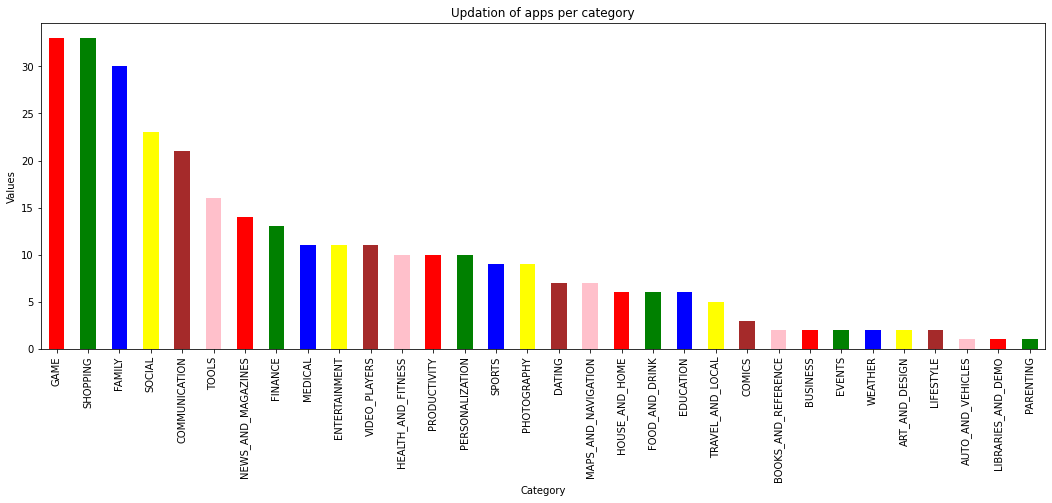

In [55]:
latest=df[df["Last Updated"]=="2018-08-03"].Category.value_counts()
latest.plot(kind="bar",title="Updation of apps per category",figsize= (18,6),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Values")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.show()

# Find out largest & smallest size app.

In [56]:
df.Size.value_counts()

14.0     166
12.0     161
15.0     159
11.0     159
13.0     157
        ... 
454.0      1
400.0      1
280.0      1
116.0      1
259.0      1
Name: Size, Length: 376, dtype: int64

In [57]:
small=df[(df.Size == df.Size.min())]
smallr = small[df.Rating >=4.5]
smallr[['App', 'Category', 'Installs','Reviews','Rating',"Size"]][:2]

<ipython-input-57-73b2959e278c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smallr = small[df.Rating >=4.5]


,App,Category,Installs,Reviews,Rating,Size
8077,go41cx,FAMILY,100000.0,171,4.8,1.0


In [58]:
large=df[(df.Size == df.Size.max())]
larger = large[df.Rating >=4.5]
large
larger[['App', 'Category', 'Installs','Reviews','Rating',"Size"]][:2]

<ipython-input-58-e02af34cae14>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  larger = large[df.Rating >=4.5]


,App,Category,Installs,Reviews,Rating,Size
8883,DTPay,SHOPPING,100000.0,18,4.5,994.0


# Best app in each category ie educational , family, game,techical etc...

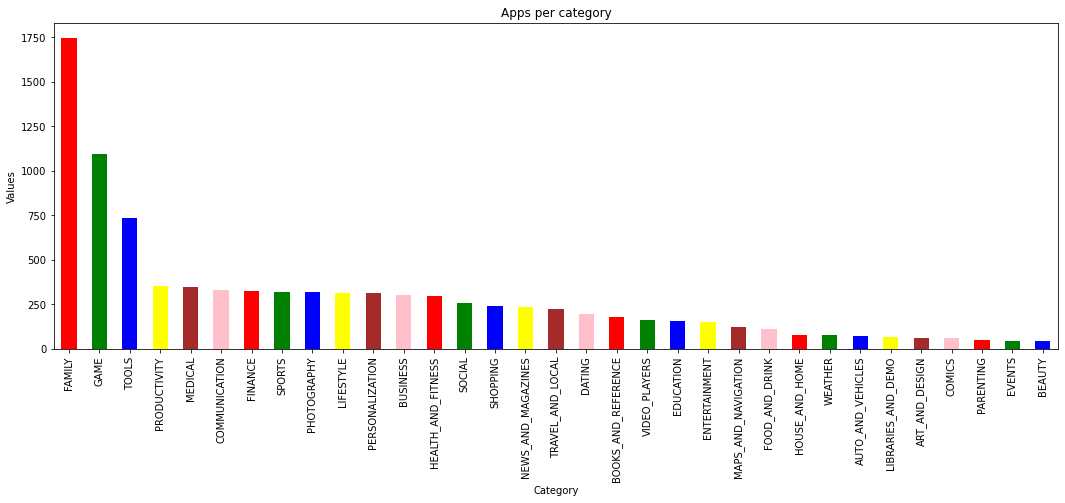

In [59]:
df.Category.value_counts().plot(kind="bar",title="Apps per category",figsize= (18,6),color=["Red","green","blue","yellow","brown","pink"])
plt.ylabel("Values")
plt.xlabel("Category")
plt.show()

In [60]:
family=df[df["Category"]=="FAMILY"]
family[(df.Rating ==5) & (df.Installs>=10000)][:5]

<ipython-input-60-b69a7d02dbde>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  family[(df.Rating ==5) & (df.Installs>=10000)][:5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5450,AP® Guide,FAMILY,5.0,3,2.1,100000.0,0,0.0,Everyone,Education,2017-07-31,489,4.0
5507,Accounting Quiz (AQ) Malaysia,FAMILY,5.0,25,NaN,100000.0,0,0.0,Everyone,Education,2018-01-29,2582,4.0
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4.0,100000.0,0,0.0,Everyone,Education,2017-12-13,816,4.0
6467,BM SPM Practice,FAMILY,5.0,6,9.2,100000.0,0,0.0,Everyone,Education,2018-01-24,103,4.0
6823,Barisal University App-BU Face,FAMILY,5.0,100,10.0,100000.0,0,0.0,Everyone,Education,2018-05-06,1490,4.0


In [61]:
games=df[df["Category"]=="GAME"]
games[(df.Rating >=4.9) & (df.Installs>=10000) & (df.Price==0)]

<ipython-input-61-d9c4492fa1ff>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games[(df.Rating >=4.9) & (df.Installs>=10000) & (df.Price==0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4975,Solitaire: Decked Out Ad Free,GAME,4.9,37302,35.0,50000000.0,0,0.0,Everyone,Card,2017-05-08,508,4.0


In [62]:
communication=df[df["Category"]=="COMMUNICATION"]
communication[(df.Rating >=4.8) & (df.Installs>=10000) & (df.Price==0) & (df["Android Ver"]==5)]

<ipython-input-62-4c56d9fde3d3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  communication[(df.Rating >=4.8) & (df.Installs>=10000) & (df.Price==0) & (df["Android Ver"]==5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7704,ClanPlay: Community and Tools for Gamers,COMMUNICATION,4.8,34443,27.0,1.000000e+09,0,0.0,Teen,Communication,2018-06-28,352,5.0


In [63]:
tools=df[df["Category"]=="TOOLS"]
tools[(df.Rating >=4.8) & (df.Installs>=10000) & (df.Price==0) & (df["Android Ver"]==5)]

<ipython-input-63-b7bf5369affc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tools[(df.Rating >=4.8) & (df.Installs>=10000) & (df.Price==0) & (df["Android Ver"]==5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7708,Calcy IV,TOOLS,4.8,36557,14.0,1.000000e+09,0,0.0,Everyone,Tools,2018-08-03,1280,5.0


In [64]:
education=df[df["Category"]=="EDUCATION"]
education[(df.Rating >=4.9) & (df.Installs>=10000) & (df.Price==0)]

<ipython-input-64-eefe13d81f59>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  education[(df.Rating >=4.9) & (df.Installs>=10000) & (df.Price==0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26.0,1.000000e+09,0,0.0,Everyone,Education;Education,2018-07-20,1097,4.0


# Android version

# how many android version in this data set

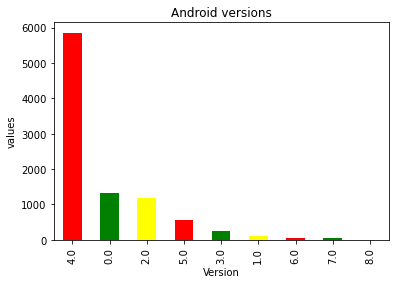

4.0    5856
0.0    1319
2.0    1177
5.0     556
3.0     250
1.0     104
6.0      48
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [65]:
ver=df["Android Ver"].value_counts()
ver.plot(kind="bar",title="Android versions",xlabel="Version",ylabel="values",color=["red","green","yellow"])
plt.show()
ver


<AxesSubplot:>

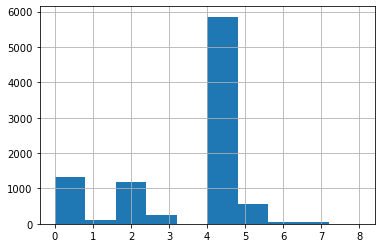

In [66]:
df["Android Ver"].hist()

# Apps support latest Android version.

In [67]:
df[df["Android Ver"]==8.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7.1,5.000000e+01,0,0.00,Everyone,Medical,2018-08-03,187,8.0
3240,Moto Suggestions ™,TOOLS,4.6,308,4.3,1.000000e+09,0,0.00,Everyone,Tools,2018-06-08,38,8.0
3275,Google Assistant Go,TOOLS,3.7,315,4.6,5.000000e+07,0,0.00,Everyone,Tools,2018-07-27,726,8.0
4460,Theme Android P for LG G7 & V35,PERSONALIZATION,4.6,5,4.5,1.000000e+03,1,1.49,Everyone,Personalization,2018-07-07,250,8.0
6582,My BP Lab,HEALTH_AND_FITNESS,2.6,186,25.0,1.000000e+06,0,0.00,Everyone,Health & Fitness,2018-05-19,252,8.0


# Correlation:Feature Selection

In [68]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                 float64
Type                       int32
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver                int32
Android Ver              float64
dtype: object

In [69]:
df.corr()

,Rating,Reviews,Size,Installs,Type,Price,Current Ver,Android Ver
Rating,1.000000,0.068133,-0.018903,0.015176,0.039592,-0.021919,0.051062,-0.026320
Reviews,0.068133,1.000000,0.036540,0.544768,-0.043244,-0.009824,0.112248,-0.121344
Size,-0.018903,0.036540,1.000000,0.006957,0.048790,0.018480,-0.055556,-0.154017
Installs,0.015176,0.544768,0.006957,1.000000,-0.025480,-0.005696,0.106995,-0.137418
Type,0.039592,-0.043244,0.048790,-0.025480,1.000000,0.223344,-0.078753,-0.023199
Price,-0.021919,-0.009824,0.018480,-0.005696,0.223344,1.000000,-0.038008,0.020120
Current Ver,0.051062,0.112248,-0.055556,0.106995,-0.078753,-0.038008,1.000000,-0.416178
Android Ver,-0.026320,-0.121344,-0.154017,-0.137418,-0.023199,0.020120,-0.416178,1.000000


In [70]:
feature=df.iloc[:,2:8]
target=df["Installs"]

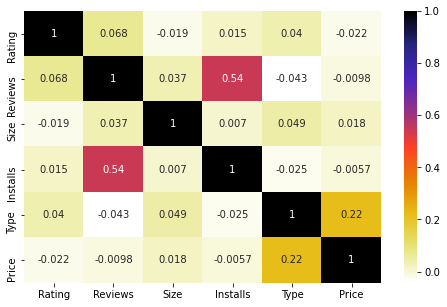

In [71]:
plt.figure(figsize=(8,5))
sns.heatmap(feature.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

# Top Apps based on Rating 5 & maximum installs.

In [72]:
df.drop_duplicates('App',inplace=True)

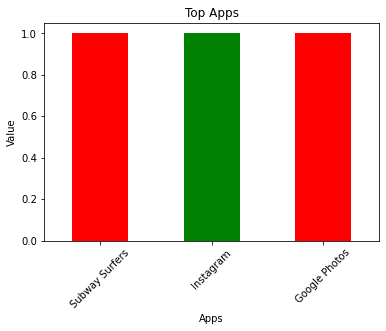

In [73]:
maxi=df[(df.Installs == df.Installs.max()) & (df["Rating"]>=4.5)].App.value_counts()
maxi.plot(kind="bar",title="Top Apps",color=["Red","green"])
plt.xlabel("Apps")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

# Conclusions
- After analysing the dataset, we clearly seen that most of the apps are from “Family” & “Game” Category.
- 93.1% of the apps are free in the Google Play Store.
- Costly App is from the Life Style Category with the price of $400.
- 246 Apps having full rating with free installation & 28 Apps having full rating with paid installation. 
- Total of 274 apps having full rating.
- 1369 free apps have more than 10 billion downloads & only 2 paid apps have more than 10      billion downloads. 
- Maximum Average, rating apps are under ‘Family’ & ‘Life style’ Category.
- The ‘Communication’ Category have maximum average Reviews & Installs.
- In Google play store, latest updates are done for 319 Apps.
- Most Famous Apps like Facebook, Instagram, Google photos & Subway Surfers are the most Rated, Reviewed & Installed Apps.
- Most of the apps having above 4.0 rating.
- Installs and reviews have the strongest positive correlation. So, the popularity of an app depends on installs & review. 



# Future Scope
The google play store dataset analysis is more helpful for developers. Which category of the apps should be built to keep the google play store popular in the future.
